## Pathways to Desistance Study

The Pathways to Desistance study ("Pathways study") was a multi-site study that followed 1,354 serious juvenile offenders, surveying them periodically from adolescence to young adulthood in Arizona and Pennsylvania between 2000 and 2010 (Mulvey, 2010). The surveys conducted covered six primary domains: (1) background characteristics, (2) indicators of individual functioning, (3) psychosocial development and attitudes, (4) family context, (5) personal relationships, and (6) community context (e.g., neighborhood conditions, personal capital, and community involvement). The aims of the study were to identify initial patterns of how serious adolescent offenders stop antisocial activity, to describe the role of social context and developmental changes in promoting these positive changes, and to compare the effects of sanctions and interventions in promoting these changes. (Mulvey, 2010). 


## Pathways to Desistance Data
The data collected over the course of the Pathways study is divided into eleven datasets, organized by recall period of the respondents. These datasets are cross-sectional, though given the uniformity of variables across datasets, it is relatively easy to construct time-series data by combining multiple datasets. 

For the purposes of our showcase, we have decided to evaluate the predictive power of early-onset behavioral issues, exposure to violence, and psychosocial maturity on likelihood of police contact for a given youth. We have decided to use the following variables from the datasets:
 - *Exposure to violence* (`S#EXPTOT`): Endorsed sum of times respondent was either the victim of or witness to violence.
 - *Early onset behavioral problems* (`S0NEARPRO`): Total count of early-onset behavioral problems endorsed (e.g., cheating, stealing, being drunk/stoned)
 - *Psychosocial Maturity* (`S#PSMI`): Mean score of respondant's Psychosocial Maturity Inventory (PSMI Form D; Greenberger, Josselson, Knerr, & Knerr, 1974) 
 - *Police contact with respondent* (`S#PROJUS_PJPOLI`): Binary variable; whether respondent was picked up by police and accused of something in the recall period
     - *Police contact with respondent, Number of times* (`S#PROJUS_PJPNUM`): How many times, if any, respondent was picked up by police and accused of something.

In [29]:
## Prework: Stage Environment

import numpy as np
import pandas as pd
import graphviz as gv
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import csv

## Load Example Dataset
filename = '84month.csv'
SAmonth = pd.read_csv(filename, na_values = [-202, -201, -101, -700, -300])
SAmonth.head()

## The na_values indicate the following:
##      -202: Partial interview, data missing
##      -201: Missed interview
##      -101: Not picked up by police during recall period
##      -700: Data missing due to bug in interview
##      -300: Too few answers for computation 


SAmetricsonly = SAmonth.drop(['CASEID', 'LINEID'], axis=1)

## Descriptive Statistics
SAmetricsonly.describe()

,SAPROJUS_PJPOLI,SAPROJUS_PJPNUM,SAPSMI,SAEXPTOT,S0NEARPRO
count,1132.000000,254.000000,1129.000000,1131.000000,1354.000000
mean,0.224382,1.350394,3.284925,1.088417,1.519941
std,0.417359,1.113721,0.423084,1.665676,1.191235
min,0.000000,1.000000,1.200000,0.000000,0.000000
25%,0.000000,1.000000,2.970000,0.000000,1.000000
50%,0.000000,1.000000,3.300000,0.000000,1.000000
75%,0.000000,1.000000,3.630000,2.000000,2.000000
max,1.000000,15.000000,4.000000,10.000000,5.000000


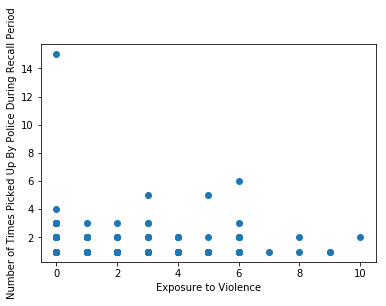

In [40]:
## Graph?

plt.scatter(SAmonth.SAEXPTOT, SAmonth.SAPROJUS_PJPNUM)
plt.xlabel("Exposure to Violence")
plt.ylabel("Number of Times Picked Up By Police During Recall Period")
plt.show()

## Final Project Showcase Proposal
As our final submission for the showcase, we plan to draft and present a research report detailing our findings based on applying decision-tree mapping, cluster analysis, and (if appropriate) KNN classification. We intend to create the report in a Jupyter Notebook and present it in class as a slidedeck. For graphical analysis, we intend to use the Python packages `graphviz` and `matplotlib`. However, we are all relatively new to using these tools, and so are not particularly proficient in them.